In [10]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando base de dados

In [11]:
df = pd.read_excel(r'C:\Users\jeanl\Desktop\IMPORTANTES\IFPE\Projeto IA - 2ª unidade\data\car.xlsx')

display(df)

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Tratamento inicial dos dados (tradução para pt-br e tratamento das variáveis de string para inteiros)

In [12]:
colunas_replace = {'buying': 'Preço de Compra',
           'maint': 'Preço de Manutenção',
           'doors': 'N° de Portas',
           'persons': 'Capacidade de Pessoas',
           'lug_boot': 'Tamanho do Porta-malas',
           'safety': 'Segurança',
           'evaluation': 'Avaliação do Carro'}

valores_replace = {'vhigh': 'Muito Alto',
           'high': 'Alto',
           'med': 'Médio',
           'low': 'Baixo',
           '5more': '5',
           'more': '5',
           'small': 'Pequeno',
           'big': 'Grande',
           'unacc': 'Inaceitável',
           'acc': 'Aceitável',
           'good': 'Bom',
           'vgood': 'Muito bom'}

df = df.rename(columns=colunas_replace)
df = df.replace(valores_replace)

display(df)

,Preço de Compra,Preço de Manutenção,N° de Portas,Capacidade de Pessoas,Tamanho do Porta-malas,Segurança,Avaliação do Carro
0,Muito Alto,Muito Alto,2,2,Pequeno,Baixo,Inaceitável
1,Muito Alto,Muito Alto,2,2,Pequeno,Médio,Inaceitável
2,Muito Alto,Muito Alto,2,2,Pequeno,Alto,Inaceitável
3,Muito Alto,Muito Alto,2,2,Médio,Baixo,Inaceitável
4,Muito Alto,Muito Alto,2,2,Médio,Médio,Inaceitável
...,...,...,...,...,...,...,...
1723,Baixo,Baixo,5,5,Médio,Médio,Bom
1724,Baixo,Baixo,5,5,Médio,Alto,Muito bom
1725,Baixo,Baixo,5,5,Grande,Baixo,Inaceitável
1726,Baixo,Baixo,5,5,Grande,Médio,Bom


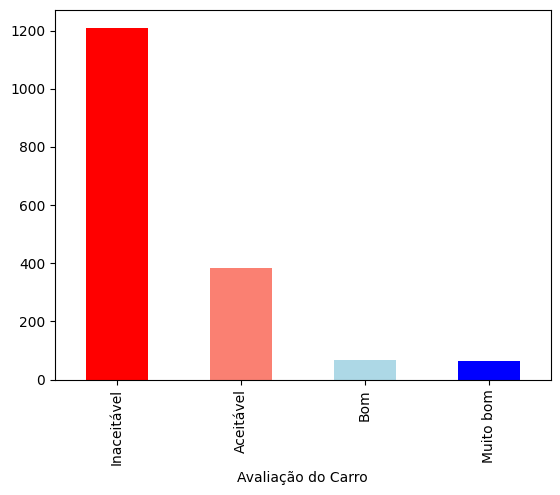

In [13]:
df["Avaliação do Carro"].value_counts().plot(kind="bar", color=["red" ,"salmon", "lightblue","blue"]);

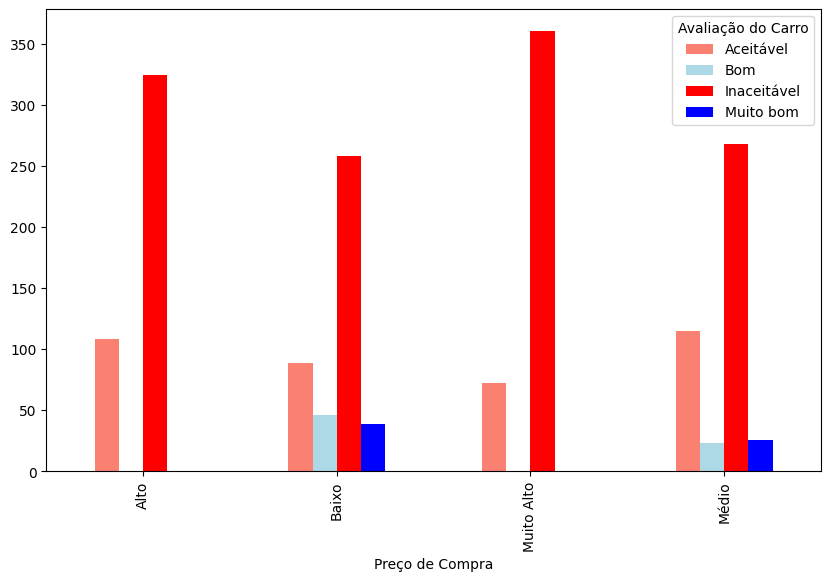

In [14]:
pd.crosstab(df["Preço de Compra"], df["Avaliação do Carro"]).plot(
    kind="bar", figsize=(10,6), color=["salmon", "lightblue", "red", "blue"]);

Criando os dummies das variáveis categóricas (todas menos a target)

In [15]:
df = pd.get_dummies(df, columns=['Preço de Compra', 'Preço de Manutenção', 'N° de Portas', 'Capacidade de Pessoas', 'Tamanho do Porta-malas', 'Segurança'],
                            prefix=['compra', 'mant', 'portas', 'pessoas', 'mala', 'sec'], prefix_sep='_')

# Para a target criaremos um dicionário para substituir os valores de string por números, mas ainda mantendo a lógica de nominalidade da variável

dicionario_avaliacao = {'Inaceitável': '0',
                        'Aceitável': '1',
                        'Bom': '2',
                        'Muito bom': '3'}

df['Avaliação do Carro'] = df['Avaliação do Carro'].replace(dicionario_avaliacao)

df = df.astype(int)

display(df)

,Avaliação do Carro,compra_Alto,compra_Baixo,compra_Muito Alto,compra_Médio,mant_Alto,mant_Baixo,mant_Muito Alto,mant_Médio,portas_2,...,portas_5,pessoas_2,pessoas_4,pessoas_5,mala_Grande,mala_Médio,mala_Pequeno,sec_Alto,sec_Baixo,sec_Médio
0,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,3,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,2,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1


Iniciando análise exploratória dos dados

<Axes: >

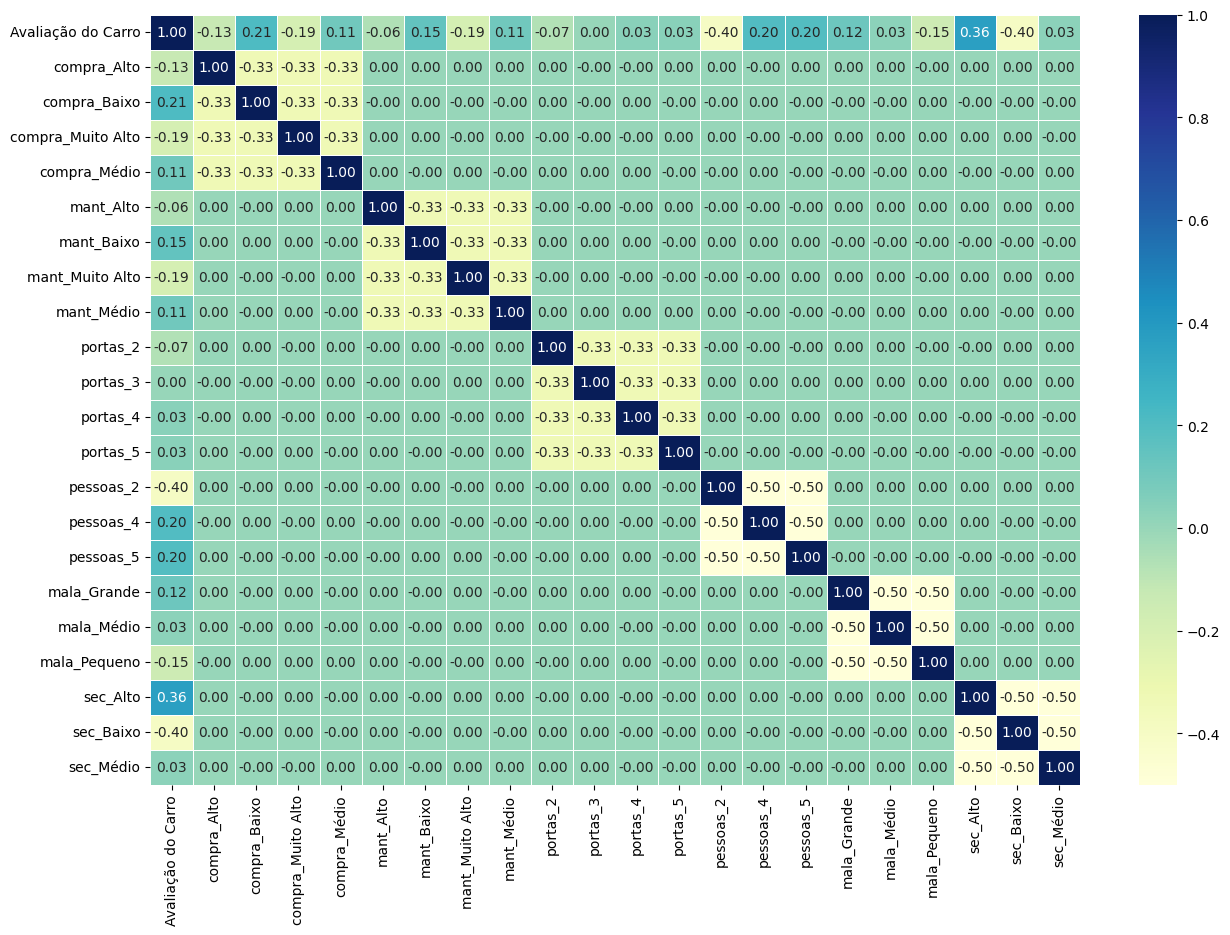

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")

Preparando os dados para iniciar o treinamento

In [22]:
# Isolando a variável que vamos prever dos outros dados
X = df.drop("Avaliação do Carro", axis=1)
y = df["Avaliação do Carro"]

X.head()


,compra_Alto,compra_Baixo,compra_Muito Alto,compra_Médio,mant_Alto,mant_Baixo,mant_Muito Alto,mant_Médio,portas_2,portas_3,...,portas_5,pessoas_2,pessoas_4,pessoas_5,mala_Grande,mala_Médio,mala_Pequeno,sec_Alto,sec_Baixo,sec_Médio
0,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Avaliação do Carro, dtype: int64

In [29]:
# Dividindo os dados em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.head()

,compra_Alto,compra_Baixo,compra_Muito Alto,compra_Médio,mant_Alto,mant_Baixo,mant_Muito Alto,mant_Médio,portas_2,portas_3,...,portas_5,pessoas_2,pessoas_4,pessoas_5,mala_Grande,mala_Médio,mala_Pequeno,sec_Alto,sec_Baixo,sec_Médio
1226,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
956,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,1,0,0
810,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1375,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
473,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0


Treinamento (topicos sklearn 1.6 / 1.7 / 1.9 / 1.10 / 1.11 / 1.17)

MODELO RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

modelo_rf = RandomForestClassifier(random_state=42)

param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2', None]
    }

random_search = RandomizedSearchCV(estimator=modelo_rf, param_distributions=param_distributions, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

print("Melhores parâmetros:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores parâmetros: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 177}


In [34]:
param_refined = {
    'n_estimators': [150, 175, 200],
    'max_depth': [25, 30, 35],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    estimator=modelo_rf,
    param_grid=param_refined,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados após o refinamento da busca:")
print(grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\jeanl\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores parâmetros encontrados após o refinamento da busca:
{'max_depth': 25, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [43]:
best_rf_model = RandomForestClassifier(
    max_depth = 25,
    max_features = None,
    min_samples_leaf = 1,
    min_samples_split = 2,
    n_estimators = 150,
    random_state = 42
)

best_rf_model.fit(X_train, y_train)

y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

print(f'Acurácia no treinamento: {accuracy_train}')
print(f'Acurácia no teste: {accuracy_test}')

print('Matriz de confusão:')
print(confusion_matrix(y_test, y_test_pred))

print('Relatório de Classificação:')
print(classification_report(y_test, y_test_pred))


Acurácia no treinamento: 1.0
Acurácia no teste: 0.9682080924855492
Matriz de confusão:
[[248   6   0   0]
 [  2  72   0   0]
 [  0   1   6   2]
 [  0   0   0   9]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       254
           1       0.91      0.97      0.94        74
           2       1.00      0.67      0.80         9
           3       0.82      1.00      0.90         9

    accuracy                           0.97       346
   macro avg       0.93      0.90      0.91       346
weighted avg       0.97      0.97      0.97       346

